# 3. 카메라 스티커앱 만들기 첫걸음

# 목차

## 1. 라이브러리
## 2. 사진 준비하기
## 3. 얼굴 검출하기
## 4. 얼굴 랜드마크
## 5. 스티커 적용하기
## 6. 문제점 찾아보기
> **1. 얼굴 각도**<br>
> **2. 이미지 밝기**<br>
> **3. 촬영거리**
## 7. 회고

## 루브릭 평가 기준

| 평가문항                                                           | 상세기준                                                                    |
|:--------------------------------------------------------------------|:-----------------------------------------------------------------------------|
| 1. 자기만의 카메라앱 기능 구현을 완수하였다.                  | 원본에 스티커 사진이 정상적으로 합성되었다.                      |
| 2. 스티커 이미지를 정확한 원본 위치에 반영하였다. | 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다. |
| 3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.                     | 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.                  |


# 라이브러리

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 사진 준비하기

In [408]:
# 이미지 위치
my_image_path = os.getenv('HOME')+'/aiffel/aiffel_project/exploration_3/data/kim.jpg'

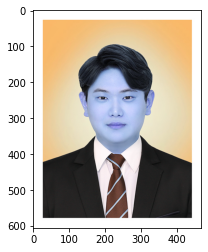

In [409]:
# 이미지 가져오기 및 출력
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

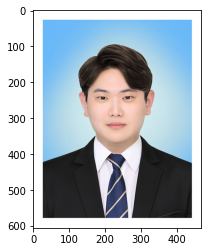

In [410]:
# 이미지 컬러 출력
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 얼굴 검출하기

참고자료 https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

In [411]:
detector_hog = dlib.get_frontal_face_detector()
detector_hog

In [412]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
dlib_rects

rectangles[[(150, 202) (304, 356)]]

참고자료 https://opencv-python.readthedocs.io/en/latest/doc/14.imagePyramid/imagePyramid.html

rectangles[[(150, 202) (304, 356)]]


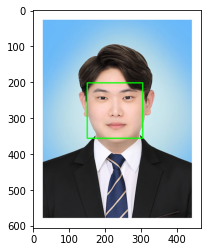

In [413]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 얼굴 랜드마크

In [414]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [415]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


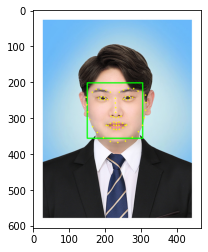

In [416]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [127]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(229, 284)
(x,y) : (229,284)
(w,h) : (155,155)


# 스티커 적용하기

In [128]:
# 스티커 이미지 가져오기
sticker_path = os.getenv('HOME')+'/aiffel/aiffel_project/exploration_3/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(155, 155, 3)


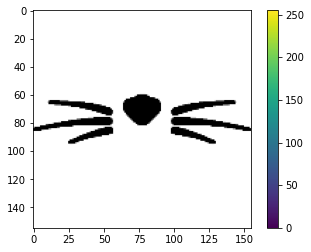

In [129]:
# 스티커 히트맵
plt.figure()
plt.imshow(img_sticker)
plt.colorbar()
plt.show()

In [130]:
# 스티커 중앙값 가져오기
cat_x = w // 2
cat_y = h // 2
print(cat_x, cat_y)

77 77


In [131]:
# x, y 값이 박스 오른쪽 아래여서 위에서 구한 값을 빼서 코 중에 이미지 넣기
refined_x = x - cat_x
refined_y = y - cat_y
print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (152,207)


In [132]:
# 원본 이미지를 넘어가는 값을 삭제

if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
    
print('(x, y) : (%d,%d)'%(refined_x, refined_y))

(x, y) : (152,207)


In [133]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

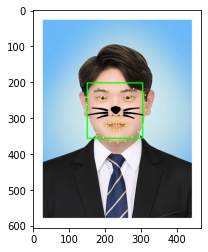

In [134]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

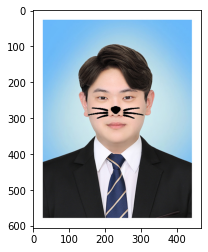

In [135]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 문제점 찾아보기

## 얼굴 각도 이미지 적용

### 이미지 가져오기 및 출력

In [346]:
img_path = os.getenv('HOME')+'/aiffel/aiffel_project/exploration_3/data/2.jpg'
img_path

'/aiffel/aiffel/aiffel_project/exploration_3/data/2.jpg'

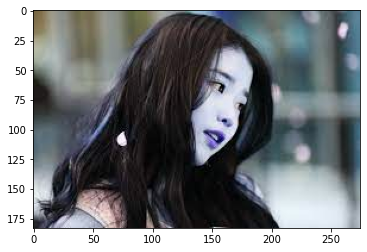

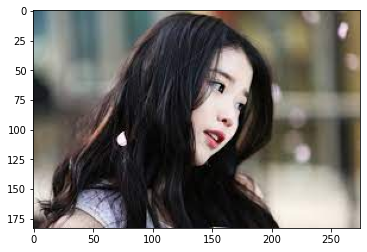

In [347]:
img_bgr = cv2.imread(img_path)
#흑백 이미지 출력
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()
# 이미지 컬러 출력
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### 얼굴에 사각형 그리기

In [348]:
detector_hog = dlib.get_frontal_face_detector()

In [349]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 0)
dlib_rects

rectangles[[(125, 53) (197, 125)]]

rectangles[[(125, 53) (197, 125)]]


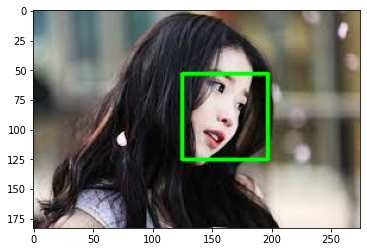

In [350]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 얼굴 도트 가져오기 및 출력

In [351]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [352]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


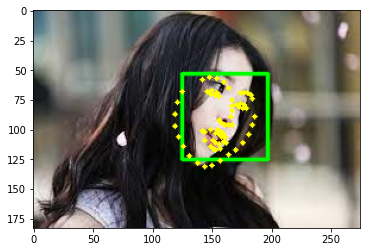

In [353]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [354]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(161, 96)
(x,y) : (161,96)
(w,h) : (73,73)


### 고양이 수염 가져오기

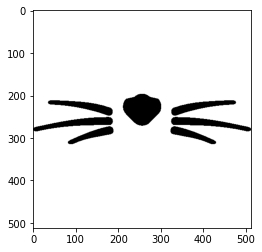

In [355]:
sticker_path = os.getenv('HOME')+'/aiffel/aiffel_project/exploration_3/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
plt.imshow(img_sticker)
plt.show()

### 고양이 수염 색 변경하기
**고양이 수염 색을 변경하는 이유는 이미지 크기를 변경하면 공백에 검은색이 생겨납니다. 그 공백을 지우기 위해서 수염 색을 미리 변경합니다.**

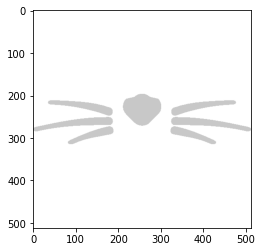

In [356]:
# 검정색 0을 찾아 200으로 변경
test = np.where(img_sticker==0, 200,img_sticker)
plt.imshow(test)
plt.show()

**이미지 회전에서 이미지 크기를 변경하는 것을 이용합니다. 이렇게 하면 이미지 크기가 줄어들고 나머지 위치에 검은색으로 변경됩니다.**

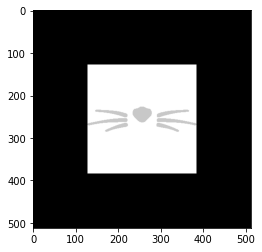

In [357]:
# 이미지 회전 크기 변경
cp = (test.shape[1] / 2, test.shape[0] / 2)# 영상의 가로 1/2, 세로 1/2
rot = cv2.getRotationMatrix2D(cp, 0, 0.5)# 0.5배로 줄이기
dst = cv2.warpAffine(test, rot, (0, 0))

plt.imshow(dst)
plt.show()


**검은색 배경을 전부 하얀색으로 변경합니다.**

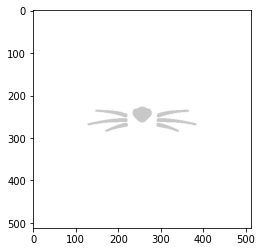

In [358]:
dst = np.where(dst==0, 255,dst)
plt.imshow(dst)
plt.show()

**이제 고양이 수염을 다시 검은색으로 변경합니다.**

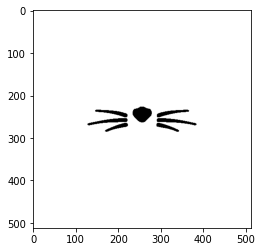

In [359]:
dst = np.where(dst==200, 0,dst)
plt.imshow(dst)
plt.show()

**고양이 수염을 회전하면서 수염 이미지를 확대합니다.**

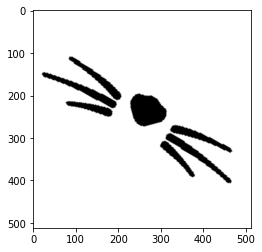

In [360]:
# 이미지 회전
cp = (dst.shape[1] / 2, dst.shape[0] / 2)# 영상의 가로 1/2, 세로 1/2
rot = cv2.getRotationMatrix2D(cp, -30, 2)# -20도 회전, 크기 2배
dst = cv2.warpAffine(dst, rot, (0, 0))

plt.imshow(dst)
plt.show()

(73, 73, 3)


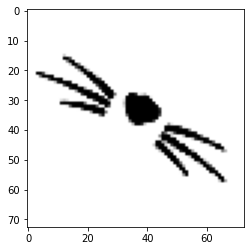

In [361]:
dst = cv2.resize(dst, (w, h))
print(dst.shape)

plt.imshow(dst)
plt.show()

### 고양이 수염 위치 선정

In [362]:
cat_x = w // 2
cat_y = h // 2
print(cat_x, cat_y)

36 36


In [363]:
refined_x = x - cat_x
refined_y = y - cat_y
print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (125,60)


In [364]:
if refined_x < 0:
    dst = dst[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    dst = dst[-refined_y:, :]
    refined_y = 0
    
print('(x, y) : (%d,%d)'%(refined_x, refined_y))

(x, y) : (125,60)


### 결과 출력하기

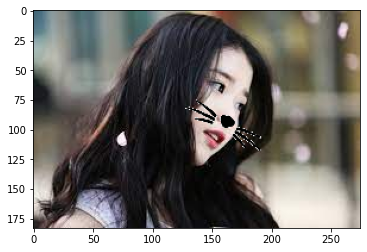

In [367]:
sticker_area = img_bgr[refined_y:refined_y +dst.shape[0], refined_x:refined_x+dst.shape[1]]
img_bgr[refined_y:refined_y +dst.shape[0], refined_x:refined_x+dst.shape[1]] = \
    np.where(dst==255,sticker_area,dst).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 문제점
- 얼굴 각도에 따라 스티커가 어떻게 변해야 할까요?
 - 얼굴각도 만큼 이미지가 회전해야 합니다.
- 이미지 회전 시 아래와 같은 문제가 발생했습니다. 그래서 위 코드와 같이 해결했습니다.

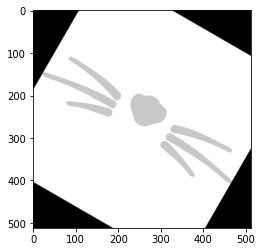

In [370]:
# 이미지 회전시 검은 배경이 생깁니다.
cp = (test.shape[1] / 2, test.shape[0] / 2)# 영상의 가로 1/2, 세로 1/2
rot = cv2.getRotationMatrix2D(cp, -30, 1)# -20도 회전
dst = cv2.warpAffine(test, rot, (0, 0))

plt.imshow(dst)
plt.show()

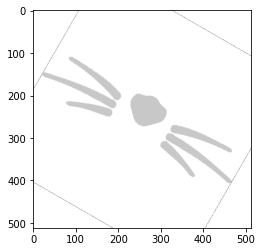

In [371]:
# 여기서 검정색을 지우면 검정색 부분을 따라 회색선이 남아서 크기를 늘리는 방식으로 변경하였습니다.
dst = np.where(dst==0, 255,dst)
plt.imshow(dst)
plt.show()

## 이미지 밝기 변경 후 적용

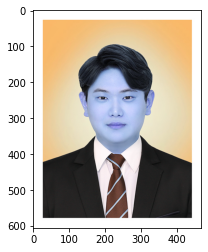

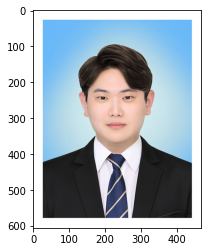

In [15]:
# 이미지 위치 저장
my_image_path = os.getenv('HOME')+'/aiffel/aiffel_project/exploration_3/data/kim.jpg'

# 이미지 출력
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

# 컬러 출력
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

(606, 469, 3)


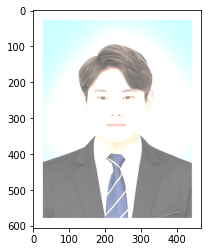

In [38]:
# 이미지 밝기 변경
# 이미지 밝기 증가 폭
val1 = 100

array1 = np.full(img_rgb.shape, (val1, val1, val1), dtype=np.uint8)

print(array1.shape)
# 이미지를 어둡게 만들고 싶으면
# add = cv2.subtract(img_rgb, array1)
add = cv2.add(img_rgb, array1)
img_show = add.copy()

#이미지 출력
plt.imshow(add)
plt.show()

In [39]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(add, 1)

rectangles[[(150, 202) (304, 356)]]


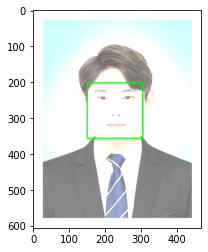

In [40]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = img_show.copy()
plt.imshow(img_show_rgb)
plt.show()

In [41]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [42]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


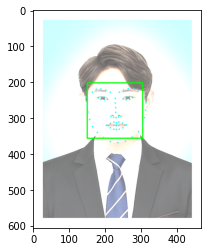

In [43]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = img_show.copy()
plt.imshow(img_show_rgb)
plt.show()

In [44]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(229, 284)
(x,y) : (229,284)
(w,h) : (155,155)


In [45]:
sticker_path = os.getenv('HOME')+'/aiffel/aiffel_project/exploration_3/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(155, 155, 3)


In [46]:
cat_x = w // 2
cat_y = h // 2
print(cat_x, cat_y)

77 77


In [47]:
refined_x = x - cat_x
refined_y = y - cat_y
print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (152,207)


In [48]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
    
print('(x, y) : (%d,%d)'%(refined_x, refined_y))

(x, y) : (152,207)


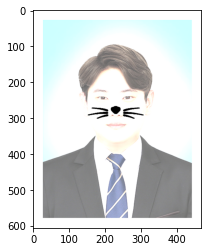

In [49]:
sticker_area = add[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
add[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(add)
plt.show()

## 이미지를 밝기를 어둡게 변경
### 밝기 100 감소
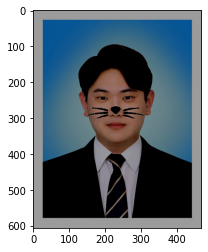

### 밝기 200 감소

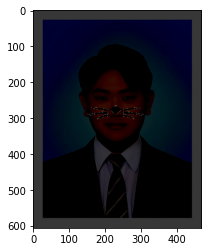

### 문제점
- 밝기 200 증가
 - 얼굴을 인식을 못 해서 사각형을 그리지 못했습니다.
- 밝기 100 증가
 - 정상적으로 작동
- 밝기 200 감소
 - 정상적으로 작동
- 밝기 100 감소
 - 정상적으로 작동

- 눈코입 등이 정상적으로 식별이 불가능할 정도로 밝기가 변경되면 사용이 불가능합니다.

# 먼 촬영 거리

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/aiffel_project/exploration_3/data/5.jpg'

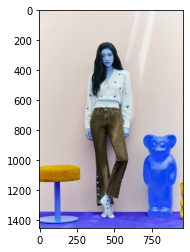

In [3]:
# 이미지 가져오기 및 출력
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

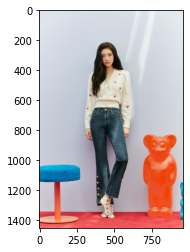

In [4]:
# 이미지 컬러 출력
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [5]:
detector_hog = dlib.get_frontal_face_detector()
detector_hog

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
dlib_rects

rectangles[[(402, 271) (509, 378)]]

rectangles[[(402, 271) (509, 378)]]


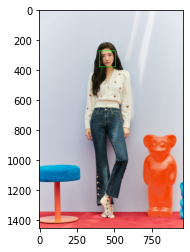

In [7]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [8]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [9]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


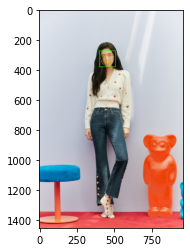

In [10]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(453, 330)
(x,y) : (453,330)
(w,h) : (108,108)


In [12]:
sticker_path = os.getenv('HOME')+'/aiffel/aiffel_project/exploration_3/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(108, 108, 3)


In [13]:
cat_x = w // 2
cat_y = h // 2
print(cat_x, cat_y)

54 54


In [14]:
refined_x = x - cat_x
refined_y = y - cat_y
print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (399,276)


In [15]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
    
print('(x, y) : (%d,%d)'%(refined_x, refined_y))

(x, y) : (399,276)


In [16]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

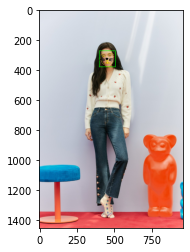

In [17]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

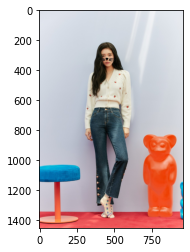

In [18]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 결과에 대한 생각
- 먼 촬영 거리이기 때문에 실패할 것으로 예상되는 사진을 가져왔습니다.
- 예상과 다르게 성공적으로 고양이 수염이 적용된 것을 알 수 있습니다.
- 만약 얼굴이 인식되지 않을 정도로 먼 거리라면 문제가 발생할 수도 있을 것 같습니다.

### 실행 속도가 중요할까요?, 스티커 앱을 만들 때 정확도가 얼마나 중요할까요?
- 실시간에서 스티커를 만드는 것인지 이미지를 가져와서 만드는 것 인지에 따라 차이가 있다고 생각합니다.
- 실시간으로 만드는 경우 정확도 보다 실행 속도가 중요하다고 생각합니다.
 - 이유는 실시간은 지속해서 움직임이 있기 때문에 정확도가 떨어질 수밖에 없고 대신 빠르게 실행을 하여 움직임에 맞춰야 하기 때문입니다.
- 이미지를 가져와서 만들 경우 정확도가 속도보다 중요하다고 생각합니다.
 - 이유는 이미지는 변화가 없기 때문에 조금 느리더라도 정확하게 만들어 져야 한다고 생각하기 때문입니다. 

# 회고

## 이번 프로젝트로 얻어가는 점
- 이미지 회전 및 이미지 크기 사용법에 대해서 알게 되었습니다.
- np.where 사용법에 대해서 확실하게 알아가게 되었습니다.
- 이미지 처리와 인덱싱 예외 처리, dlib 라이브러리 사용법 등을 알게 되었습니다.

## 어려웠던 점
- 이미지 회전 시 발생하는 검은색 바탕과 고양이 수염이 검은색으로 겹쳐서 이것을 처리하는 것이 어려웠습니다.

## 추가로 공부 또는 시도하고 싶은 것
- 촬영 거리가 얼마나 멀어지면 실패할 것 인가를 추가로 시도해봐야 할 것 같습니다.
- 추후 기회가 된다면 이미지가 아닌 실시간으로 스티커 이미지를 만드는 것에 관해서 공부해보고 싶습니다.
- 얼굴 각도가 어느 정도까지 인식이 되는지 궁금합니다.
- 이미지 회전 시 나타나는 검은색 바탕을 제가 사용한 방법 말고 다른 방법이 있을 것 같아 추가로 공부하고 싶습니다.